In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from helper_functions import plot_heatmap, plot_3D, plot_2D
from sklearn.preprocessing import RobustScaler

In [3]:
df = pd.read_csv('gt_2015.csv')
# drop columns identified in FeatureReduction notebook
df.drop(['CDP', 'TEY', 'TIT'], inplace=True,axis=1)

In [4]:
# Normalize
scaler = RobustScaler()
norm_array = scaler.fit_transform(df)
df = pd.DataFrame(norm_array, columns=df.columns)

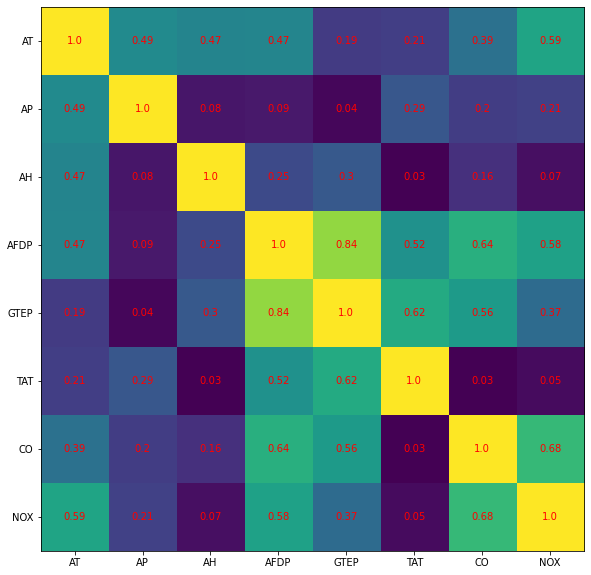

In [5]:
plot_heatmap(df)

In [6]:
from itertools import combinations

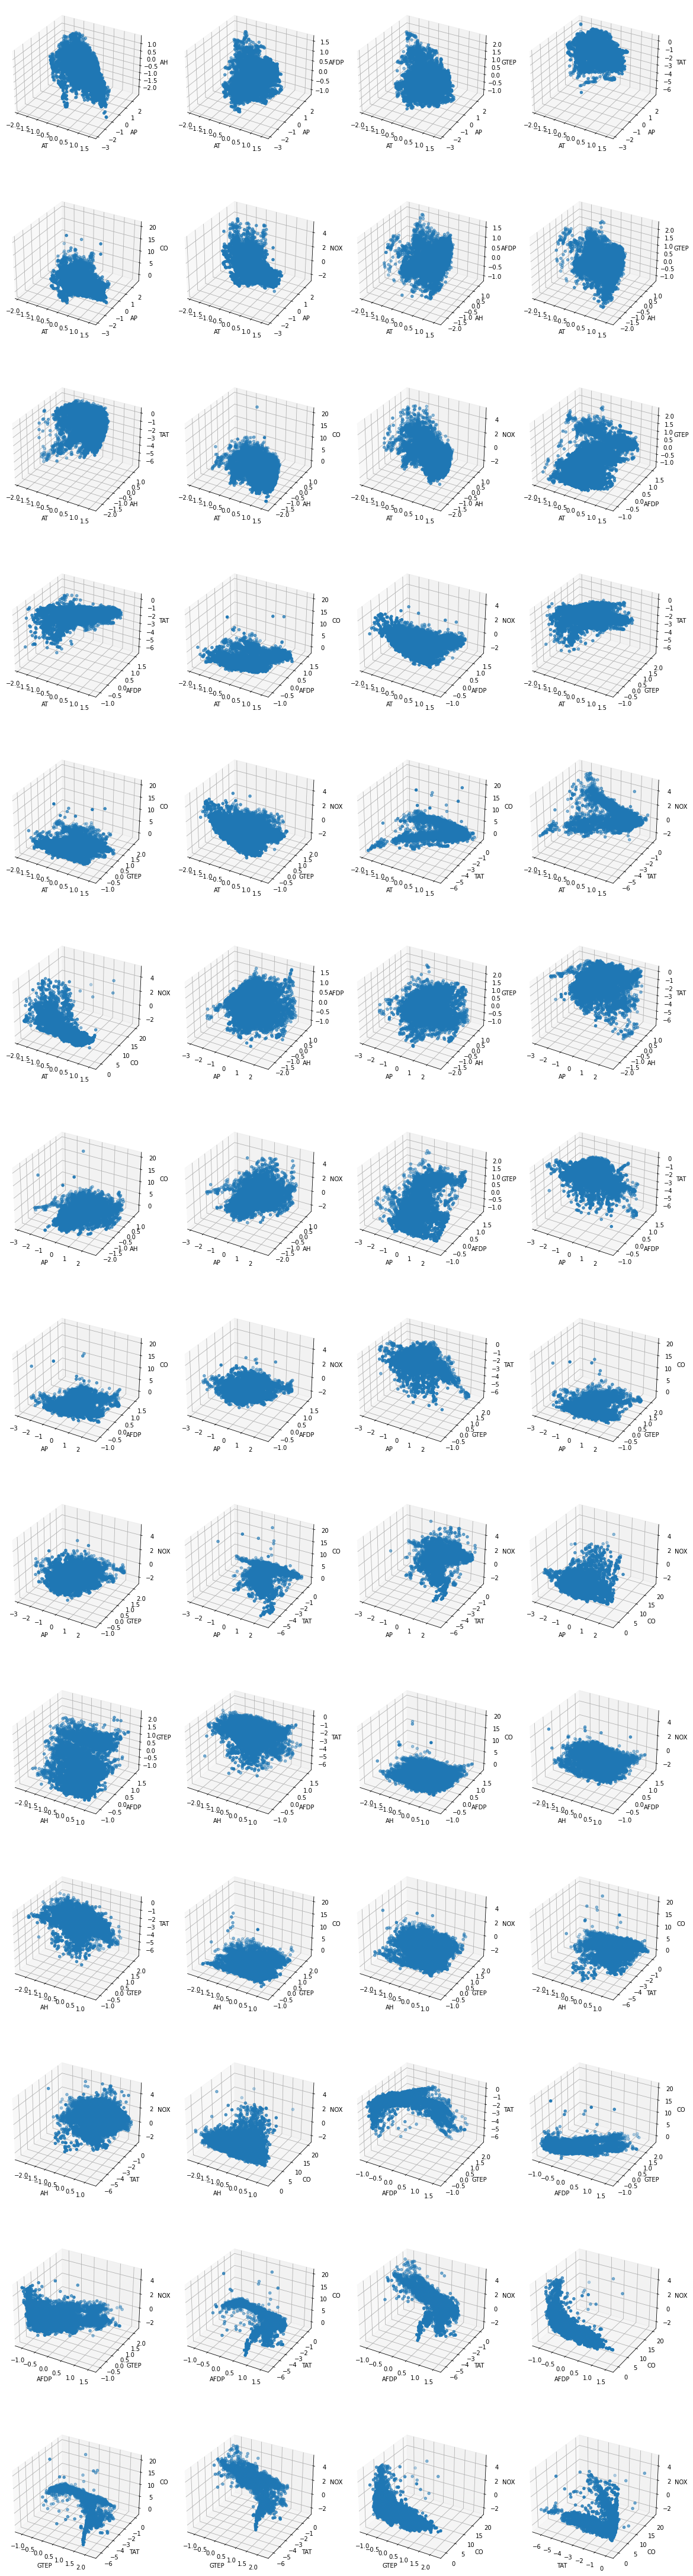

In [7]:
combos = combinations(df.columns, 3)
fig, axes = plt.subplots(14, 4, figsize=[20,80], subplot_kw={'projection':'3d'})
for ax, combo in zip(axes.flatten(), combos):
    plot_3D(df, combo, ax)

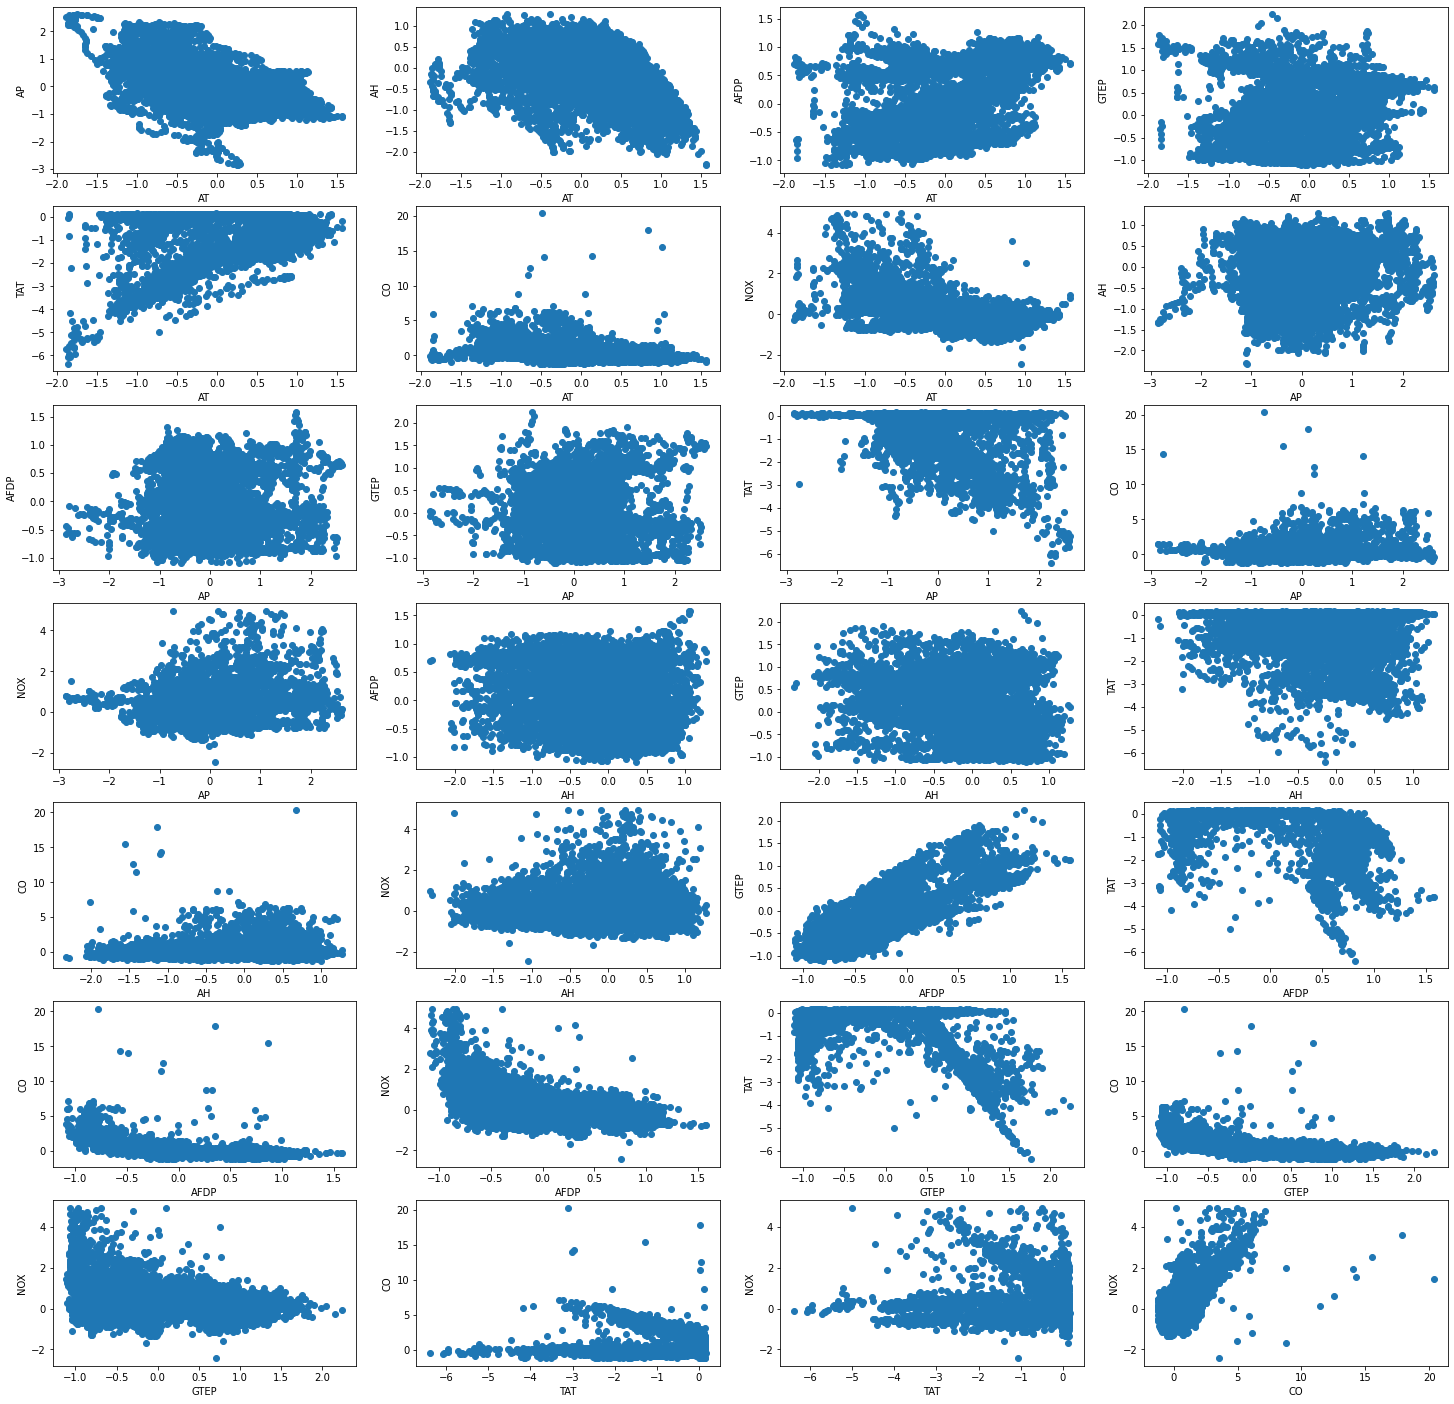

In [8]:
combos = combinations(df.columns, 2)
fig, axes = plt.subplots(7, 4, figsize=[25,25])
for ax, combo in zip(axes.flatten(), combos):
    plot_2D(df, combo, ax)

In [9]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN

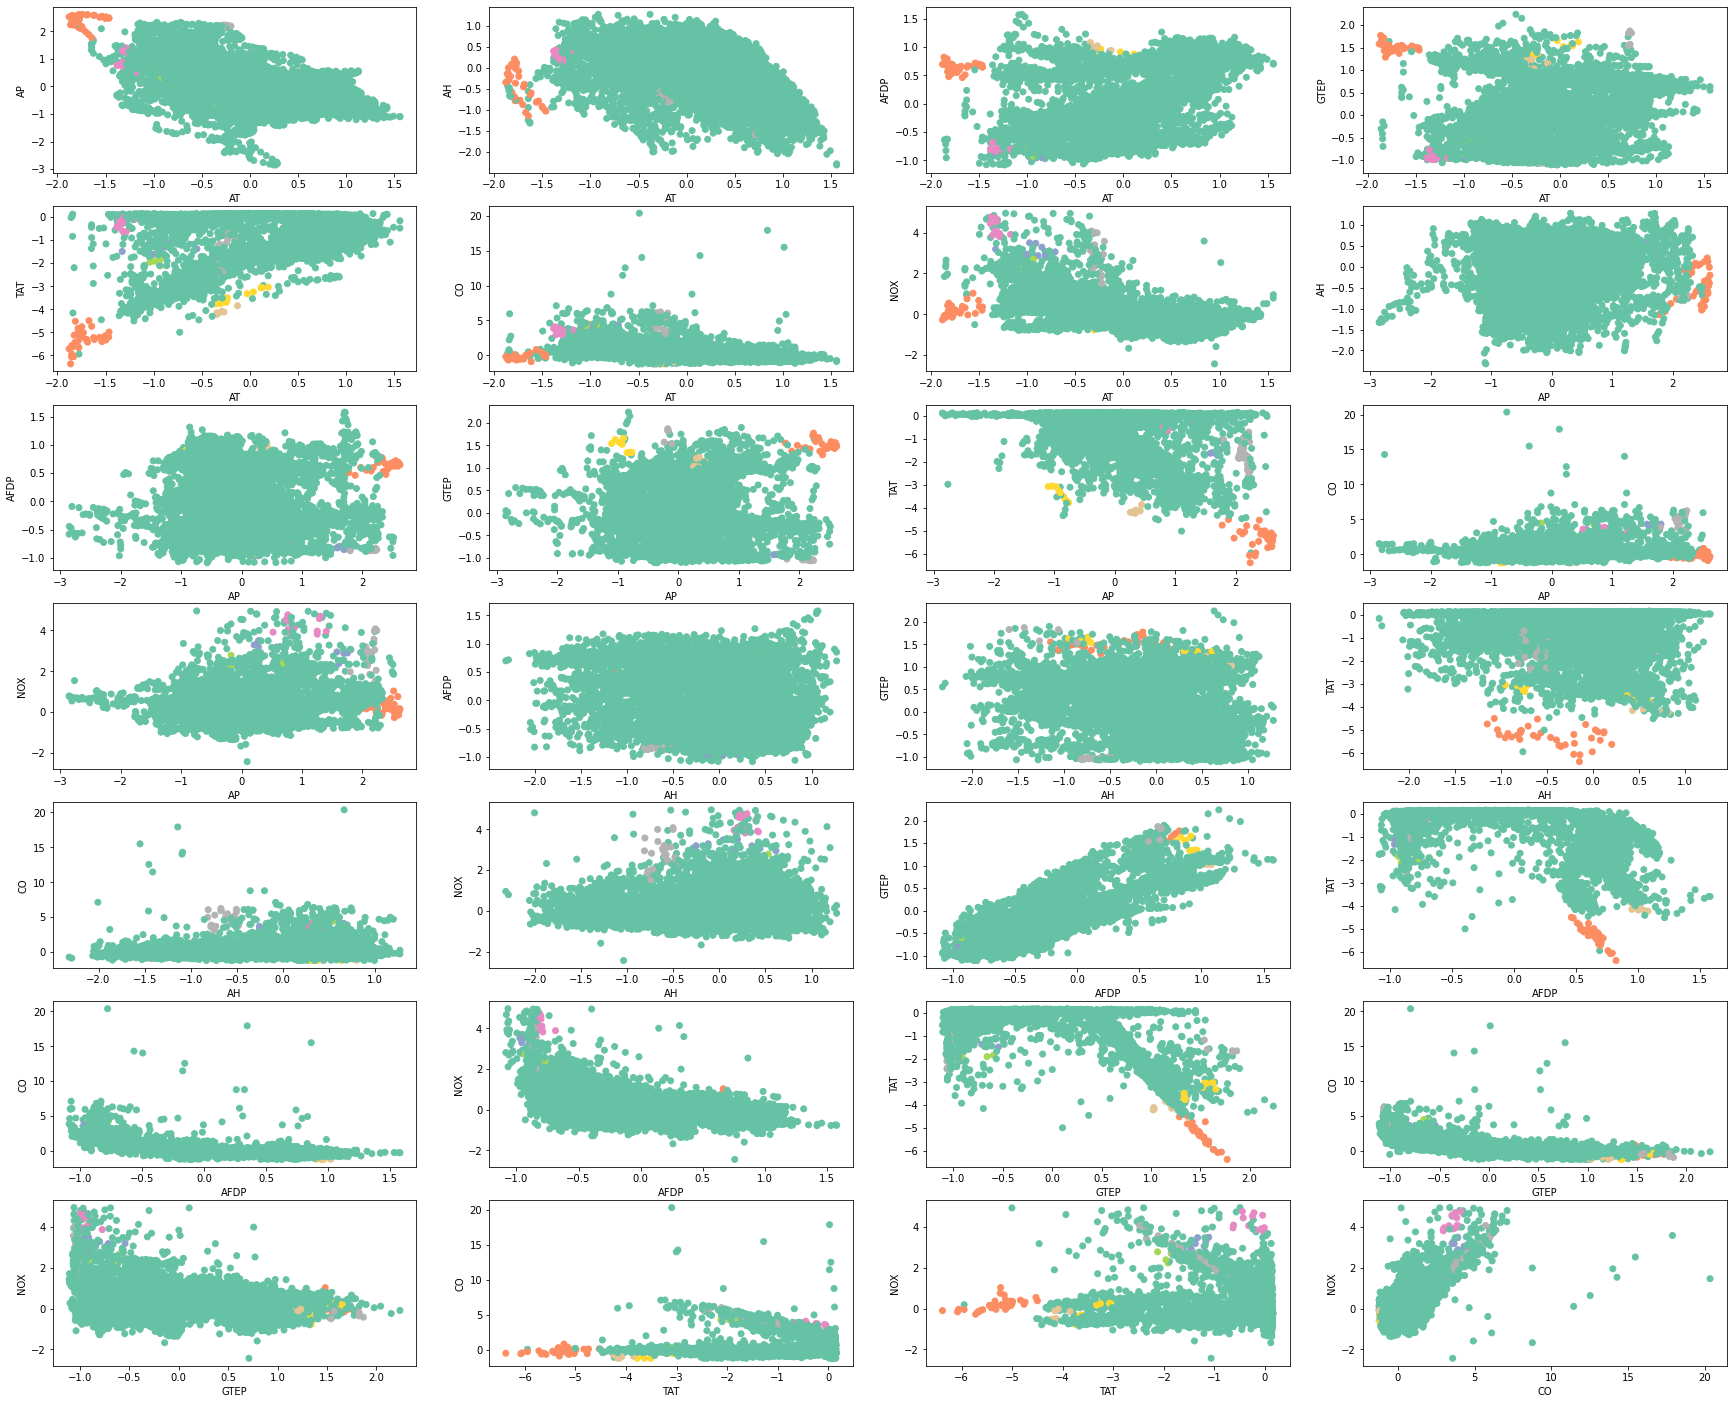

In [10]:
combos = combinations(df.columns, 2)
fig, axes = plt.subplots(7, 4, figsize=[30,25])
cls = DBSCAN(eps=0.75)
clusters = cls.fit_predict(df)
for ax, combo in zip(axes.flatten(), combos):
    plot_2D(df, combo, ax, clusters)

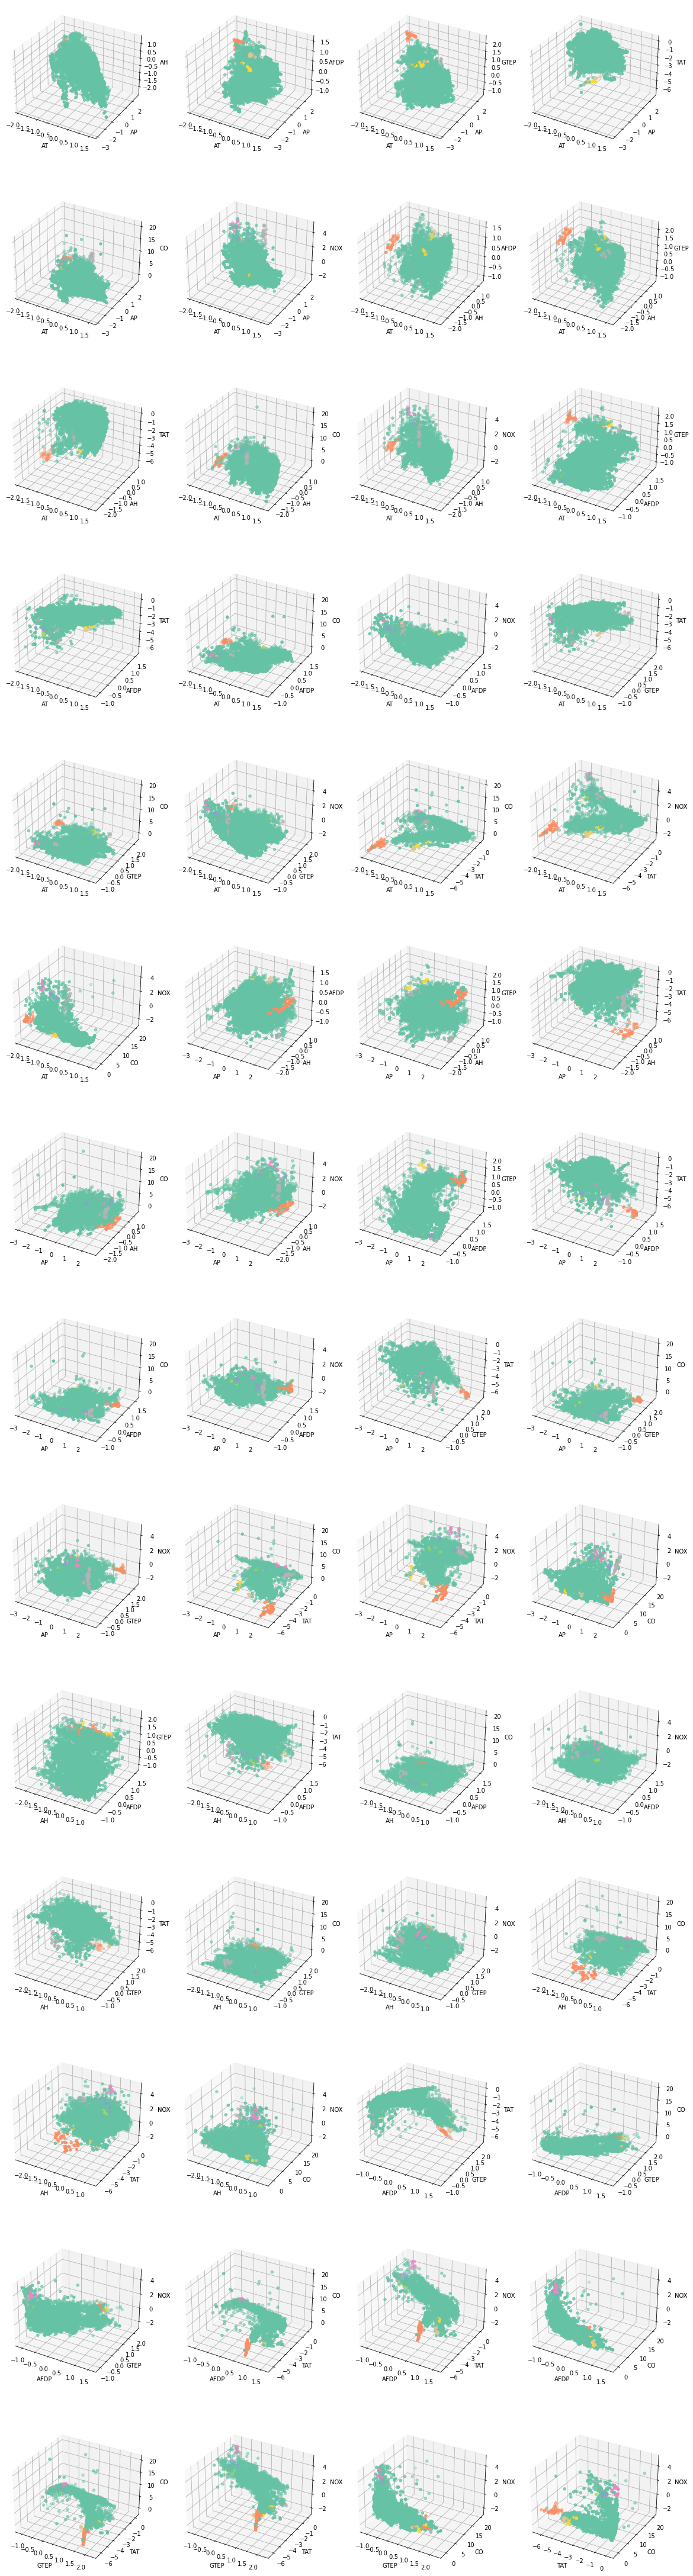

In [11]:
combos = combinations(df.columns, 3)
fig, axes = plt.subplots(14, 4, figsize=[20,80], subplot_kw={'projection':'3d'})
for ax, combo in zip(axes.flatten(), combos):
    plot_3D(df, combo, ax, clusters)

In [12]:
np.unique(clusters, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64),
 array([ 262, 7016,   36,    5,    5,   12,    4,    5,    5,    7,    5,
          22], dtype=int64))

In [13]:
# curated clusters
cc = (clusters == 1).astype(np.int64)

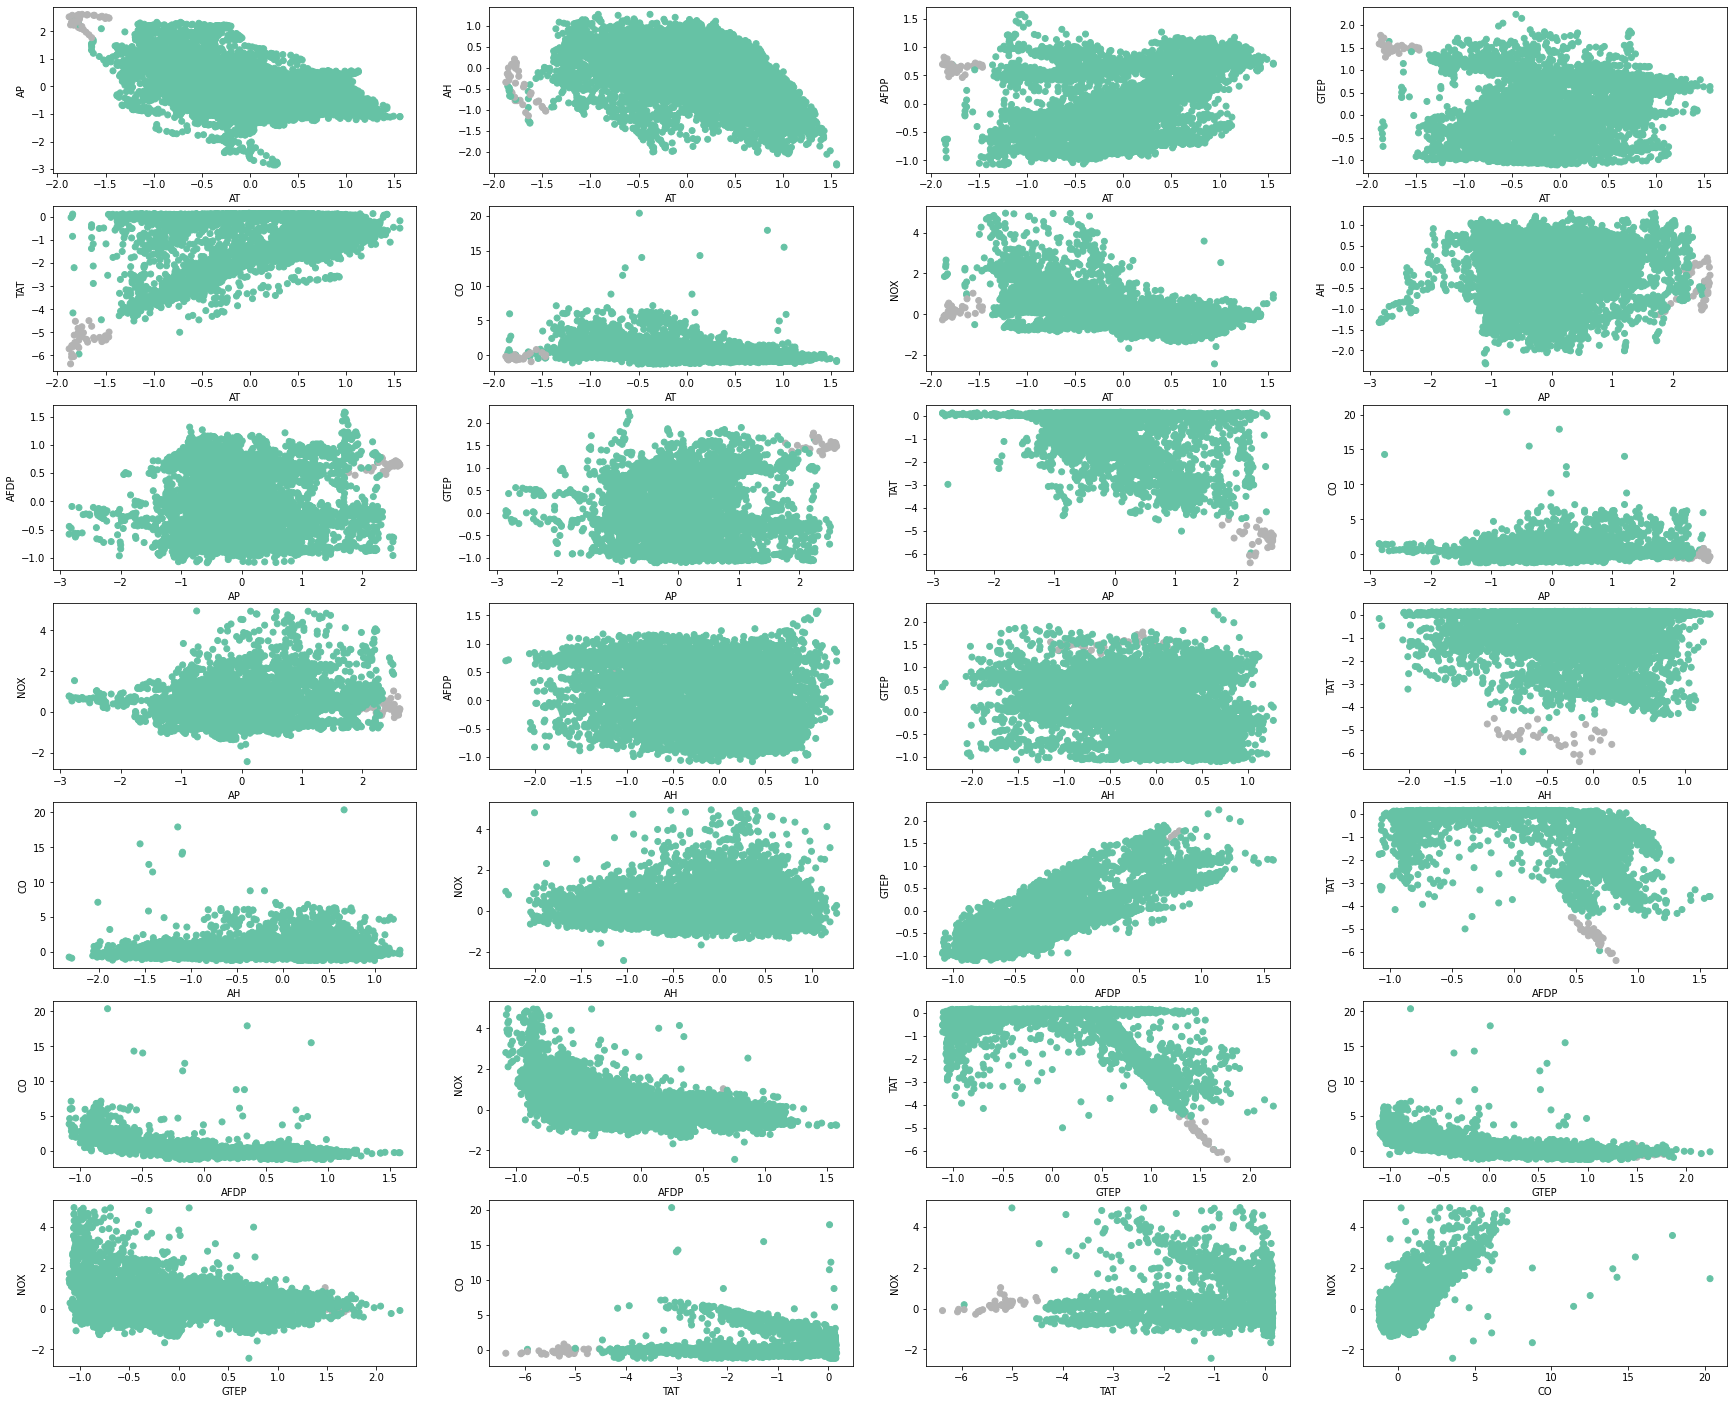

In [14]:
combos = combinations(df.columns, 2)
fig, axes = plt.subplots(7, 4, figsize=[30,25])
for ax, combo in zip(axes.flatten(), combos):
    plot_2D(df, combo, ax, cc)

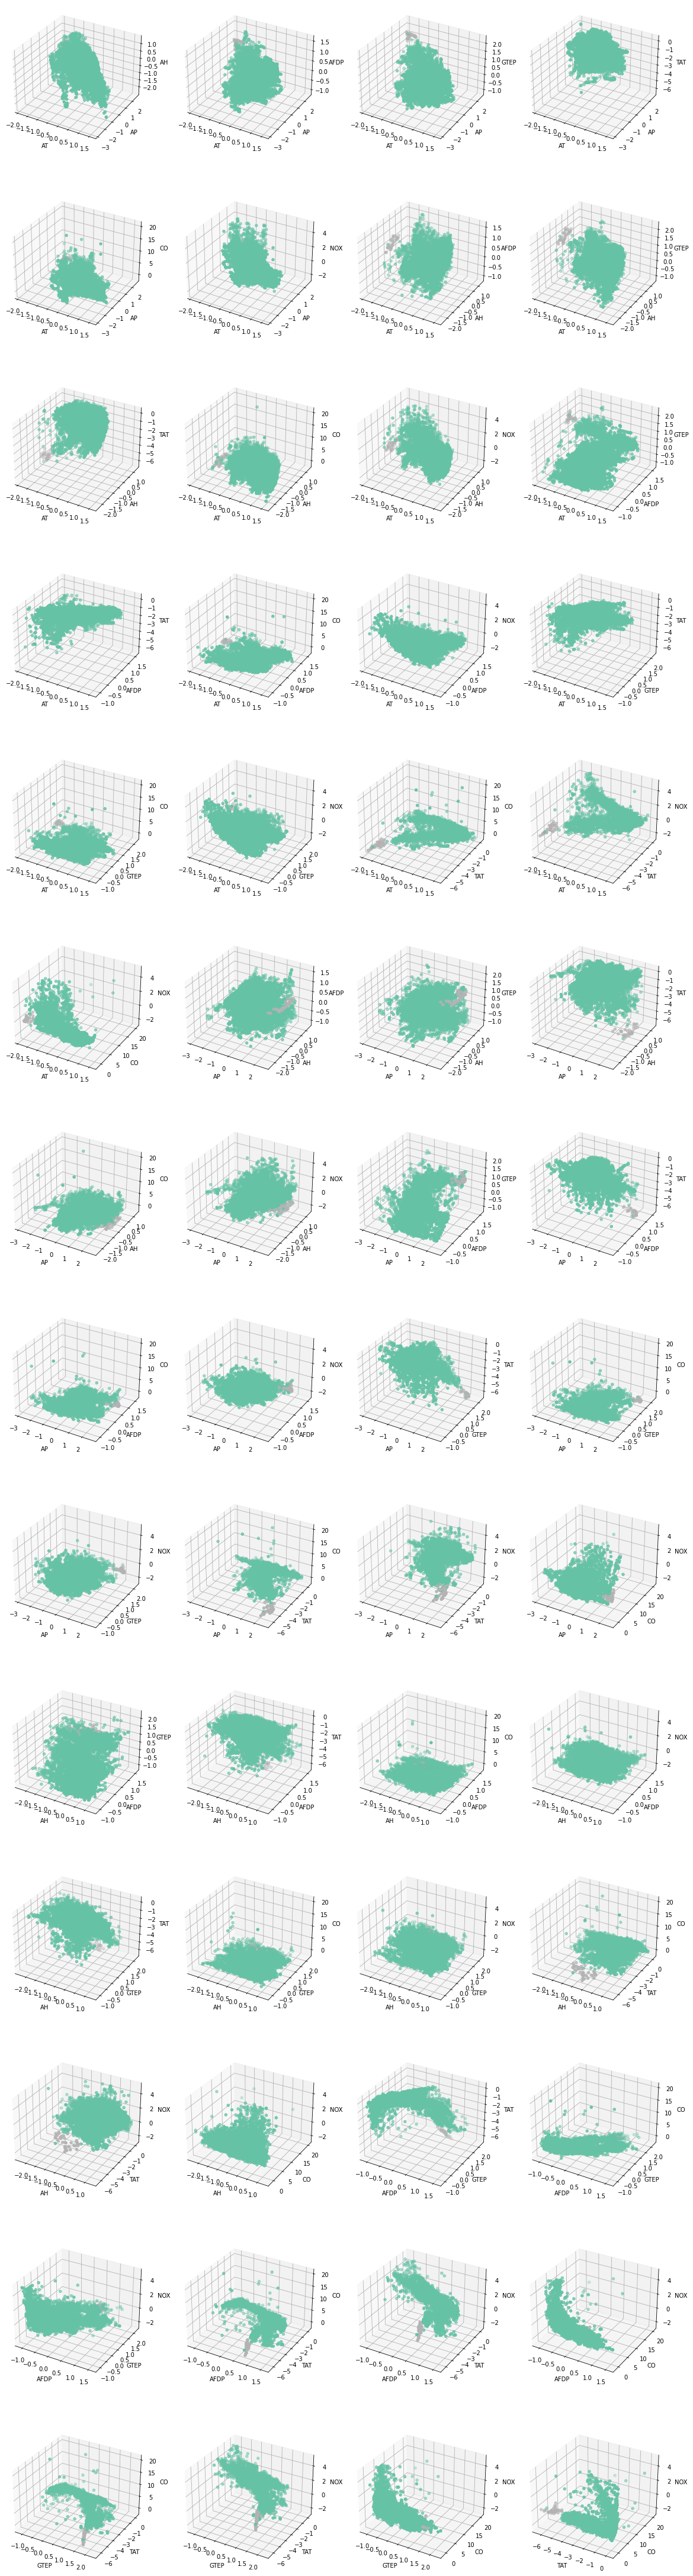

In [15]:
combos = combinations(df.columns, 3)
fig, axes = plt.subplots(14, 4, figsize=[20,80], subplot_kw={'projection':'3d'})
for ax, combo in zip(axes.flatten(), combos):
    plot_3D(df, combo, ax, cc)

In [16]:
np.unique(cc, return_counts=True)

(array([0, 1], dtype=int64), array([7348,   36], dtype=int64))

# Explain Clusters

Explain the clusters using a decision tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text, plot_tree

In [18]:
clf = DecisionTreeClassifier(class_weight='balanced', max_depth=2)
clf.fit(df, cc)
clf.score(df, cc)

0.9998645720476707

In [19]:
print(export_text(clf, feature_names=list(df.columns.values)))

|--- TAT <= -4.48
|   |--- AT <= -1.33
|   |   |--- class: 1
|   |--- AT >  -1.33
|   |   |--- class: 0
|--- TAT >  -4.48
|   |--- class: 0



In [20]:
df.columns.values

array(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TAT', 'CO', 'NOX'], dtype=object)

In [21]:
predicted = clf.predict(df)

In [22]:
pred_1 = df[predicted == 1]

In [23]:
cc_pred = cc[predicted == 1]
cc_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [24]:
# Reverse the scaling to get actual values for the rules
rules = pd.DataFrame([[-1.33, 0, 0, 0, 0, -4.48, 0,0]], columns=df.columns)

rules_df = pd.DataFrame(scaler.inverse_transform(rules), columns=df.columns)
rules_df

AT      AP      AH    AFDP    GTEP       TAT      CO      NOX
0  0.683205  1014.0  70.952  3.5385  25.331  526.0544  2.5334  56.8385